In [1]:
import pandas as pd
import torch
import numpy as np
import sys
import os
sys.path.append("scripts/")
from ixnos import *
import matplotlib.pyplot as plt
import seaborn as sns

model_path = "processed-data/iwasaki/models/ixnos_n3p2_full.pth"
# Initialize an iXnos model that looks at the same indices as the one you want to load
model = iXnos(min_codon=-3, max_codon=2)
# Load the trained weights into the model
model.load_state_dict(
    torch.load(model_path, weights_only=False))
model.eval()

iXnos(
  (layers): Sequential(
    (0): Linear(in_features=456, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=1, bias=True)
    (3): ReLU()
  )
)

In [2]:
v_scores_fast, actual_scores_fast = [], []
v_scores_slow, actual_scores_slow = [], []
fast_seqs, slow_seqs = [], []
aa_seqs = []

In [9]:
for i in range(5):
    print(i)
    seq = "".join(np.random.choice(list(iXnos.get_aa_to_codon().keys()), np.random.randint(10, 15)))
    fastseq, fastv = model.optimize_codons(seq, fastest=True, sanity_check=True)
    slowseq, slowv = model.optimize_codons(seq, fastest=False, sanity_check=True)
    v_scores_fast.append(fastv)
    v_scores_slow.append(slowv)
    actual_scores_fast.append(model.predict_elongation(fastseq))
    actual_scores_slow.append(model.predict_elongation(slowseq))
    aa_seqs.append(seq)
    fast_seqs.append(fastseq)
    slow_seqs.append(slowseq)

0
1
2
3
4


In [30]:
len(slow_seqs[0]) / 3, len(aa_seqs[0])
# iXnos.get_codon_to_id().items()
[[k for k, v in iXnos.get_aa_to_codon().items() if slow_seqs[s:s+3] in v] for s in range(0, len(slow_seqs), 3)], (aa_seqs[0])
# iXnos.get_aa_to_codon().items()

([[], [], [], []], 'HKQINHSEMSLTP')

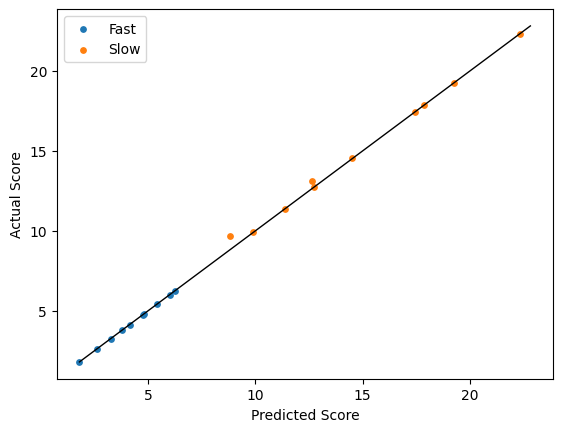

In [11]:
plt.scatter(v_scores_fast, actual_scores_fast, label="Fast", s=15)
plt.scatter(v_scores_slow, actual_scores_slow, label="Slow", s=15)
val_range = np.arange(min(v_scores_fast + v_scores_slow), max(v_scores_fast + v_scores_slow) + 1)
plt.plot(val_range, val_range, c='k', linewidth=1)
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.legend()
plt.show()

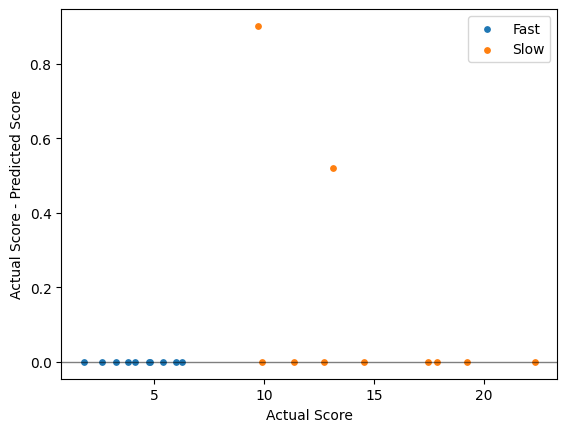

In [12]:
plt.scatter(actual_scores_fast, np.subtract(actual_scores_fast, v_scores_fast), label="Fast", s=15)
plt.scatter(actual_scores_slow, np.subtract(actual_scores_slow, v_scores_slow), label="Slow", s=15)
# val_range = np.arange(min(v_scores_fast + v_scores_slow), max(v_scores_fast + v_scores_slow) + 1)
# plt.plot(val_range, val_range, c='k', linewidth=1)
plt.axhline(0, c='k', linewidth=1, alpha=0.5)
plt.xlabel("Actual Score")
plt.ylabel("Actual Score - Predicted Score")
plt.legend()
plt.show()

In [13]:
print(np.subtract(v_scores_fast, actual_scores_fast))
print(np.subtract(v_scores_slow, actual_scores_slow))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
 -0.90127468 -0.52012408  0.          0.        ]


In [15]:
print([sum(model.predict_elongation(i, profile=True)[-2:]) for i in fast_seqs])
print([sum(model.predict_elongation(i, profile=True)[-2:]) for i in slow_seqs]) 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9012746810913086, 0.520124077796936, 0.0, 0.0]


In [8]:
cds = "ATG" + "".join(np.random.choice(iXnos.get_codons(), 10))
model.predict_elongation(cds, profile=True)

[0.0,
 0.0,
 0.26736128330230713,
 0.14945971965789795,
 0.6190383434295654,
 0.5782546997070312,
 0.5854688882827759,
 0.0,
 1.2178078889846802,
 0.0,
 0.0]